# Exercici 1
#### Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

#### Crea almenys una visualització per:

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/RAUL/NISSAN/GENERAL/USB/FORMACION/BootCamp - Data Scientist_Analist/IT Academy Cibernarium - Data Science/Data Science Itinerario/4.- Visualitzación gráfica de datos/Entrega/preu lloguer per trimestre i barri.csv')


* Resum estadístic

In [3]:
df.isnull().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

In [4]:
df.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


In [11]:
df['Preu'] = df['Preu'].astype(float) # Canviem el tipus de la columna preu per poder fer càlculs

In [12]:
#Eliminem els registres que no ténen dades de Preu ja que a priori no són interessants per fer l'anàlisis
df = df[df['Preu'] != '--']

In [13]:
df.shape

(540, 8)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             540 non-null    int64  
 1   Trimestre       540 non-null    int64  
 2   Codi_Districte  540 non-null    int64  
 3   Nom_Districte   540 non-null    object 
 4   Codi_Barri      540 non-null    int64  
 5   Nom_Barri       540 non-null    object 
 6   Lloguer_mitja   540 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 38.0+ KB


In [15]:
df_Preu_mensual = df[df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']
df_Preu_mensual.describe().round(4)

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,270.0,270.0000,270.0000,270.0000,270.0000
mean,2021.0,2.5037,6.1852,36.4593,871.5937
std,0.0,1.1201,2.8420,21.3909,221.1928
min,2021.0,1.0000,1.0000,1.0000,447.5000
25%,2021.0,2.0000,3.2500,18.2500,742.4750
50%,2021.0,2.5000,7.0000,35.0000,816.3500
75%,2021.0,3.7500,8.0000,55.0000,934.5250
max,2021.0,4.0000,10.0000,73.0000,1816.5000


In [16]:
df_Preu_m2 = df[df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)']
df_Preu_m2.describe().round(4)

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,270.0,270.0000,270.0000,270.0000,270.0000
mean,2021.0,2.5037,6.1852,36.4593,12.7207
std,0.0,1.1201,2.8420,21.3909,1.7015
min,2021.0,1.0000,1.0000,1.0000,6.7000
25%,2021.0,2.0000,3.2500,18.2500,11.6250
50%,2021.0,2.5000,7.0000,35.0000,12.7500
75%,2021.0,3.7500,8.0000,55.0000,13.6000
max,2021.0,4.0000,10.0000,73.0000,18.0000


In [17]:
df_pvt=df[["Nom_Districte", "Lloguer_mitja"]]
pivotTable = df_pvt.pivot_table(index= "Nom_Districte", columns= "Lloguer_mitja", values="Lloguer_mitja", aggfunc= 'size', fill_value=0)
pivotTable

Lloguer_mitja,Lloguer mitjà mensual (Euros/mes),Lloguer mitjà per superfície (Euros/m2 mes)
Nom_Districte,,
Ciutat Vella,16,16
Eixample,24,24
Gràcia,20,20
Horta-Guinardó,40,40
Les Corts,12,12
Nou Barris,40,40
Sant Andreu,26,26
Sant Martí,40,40
Sants-Montjuïc,28,28


* Una variable categòrica (Districte o Barri)

In [18]:
df_Barris=df['Nom_Districte']
df_Barris = df_Barris.value_counts().rename_axis('Barris').reset_index(name='N_registres')
df_Barris.set_index('Barris', inplace=True) #Quan es dibuixa directament amb plotly l'índex és el que es fa servir per
# les categories de les coordenades X, si es fa amb el 

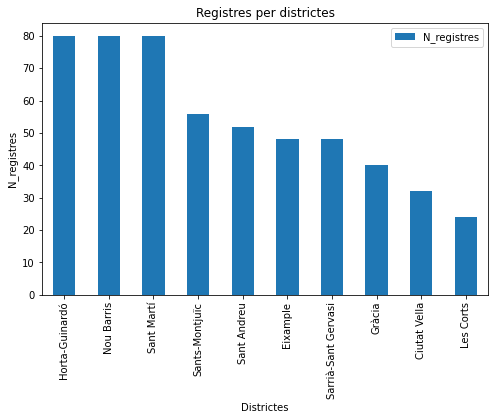

<Figure size 720x194.4 with 0 Axes>

In [19]:
p1=df_Barris.plot(kind='bar', figsize=(8, 5))
plt.title('Registres per districtes')
plt.ylabel('N_registres')
plt.xlabel('Districtes')
plt.figure(figsize=(10, 2.7))

plt.show()

* Una variable numèrica (Preu)

In [20]:
df_Preu_mensual_1=df_Preu_mensual.sort_values(by='Preu', ascending=False)
df_Preu_mensual_1.reset_index(drop=True, inplace=True)
df_Preu_mensual_1=df_Preu_mensual_1['Preu']

In [21]:
df_Preu_m2_1=df_Preu_m2.sort_values(by='Preu', ascending=False)
df_Preu_m2_1.reset_index(drop=True, inplace=True)
df_Preu_m2_1=df_Preu_m2_1['Preu']

Text(0, 0.5, 'Registres')

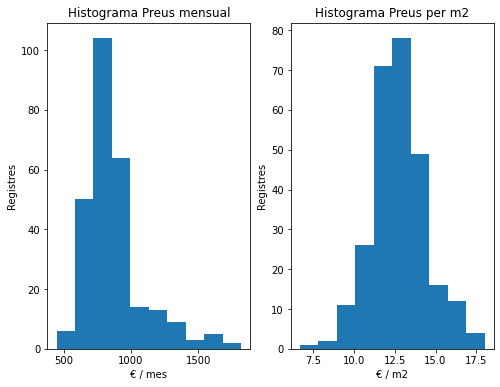

In [22]:
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
p2=df_Preu_mensual_1.plot(kind='hist', x='df_Preu_mensual', figsize=(10, 6))
plt.title('Histograma Preus mensual')
plt.xlabel('€ / mes')
plt.ylabel('Registres')

plt.subplot(1, 2, 2)
p3=df_Preu_m2_1.plot(kind='hist', x='df_Preu_m2', figsize=(8, 6))
plt.title('Histograma Preus per m2')
plt.xlabel('€ / m2')
plt.ylabel('Registres')

* Una variable numèrica i una categòrica (Districte i Preu)

In [23]:
df_Preu_mensual_2=df_Preu_mensual.sort_values(by='Preu', ascending=False)
df_Preu_mensual_2.reset_index(drop=True, inplace=True)
df_Preu_mensual_Districte=df_Preu_mensual_2[['Nom_Districte','Preu']]

In [24]:
df_Preu_m2_2=df_Preu_m2.sort_values(by='Preu', ascending=False)
df_Preu_m2_2.reset_index(drop=True, inplace=True)
df_Preu_m2_Districte=df_Preu_m2_2[['Nom_Districte','Preu']]

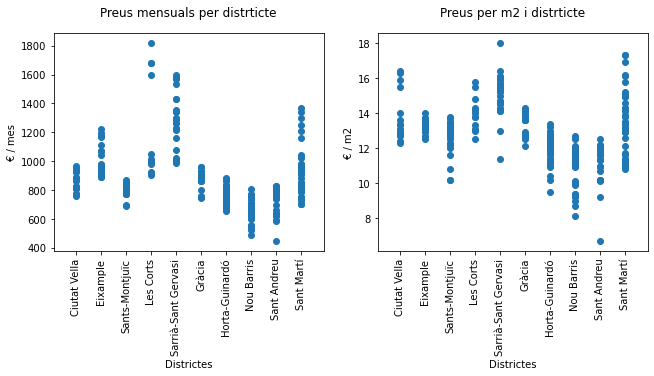

In [25]:
plt.subplot(1, 2, 1)

# Adjust the subplot layout parameters

plt.subplot(1, 2, 1)
p4=plt.scatter(df_Preu_mensual["Nom_Districte"].astype(str), df_Preu_mensual["Preu"])
plt.margins(x=0.1)
plt.xticks(rotation=90)

plt.title('Preus mensuals per distrticte', y=1.05)
plt.xlabel('Districtes')
plt.ylabel('€ / mes')



plt.subplot(1, 2, 2)
p5=plt.scatter(df_Preu_m2["Nom_Districte"].astype(str), df_Preu_m2["Preu"])
plt.margins(x=0.1)
plt.xticks(rotation=90)

plt.title('Preus per m2 i distrticte', y=1.05)
plt.xlabel('Districtes')
plt.ylabel('€ / m2')

plt.subplots_adjust(right=1.50)

plt.show()

Text(0.5, 1.0, 'Preus m2 per distrticte')

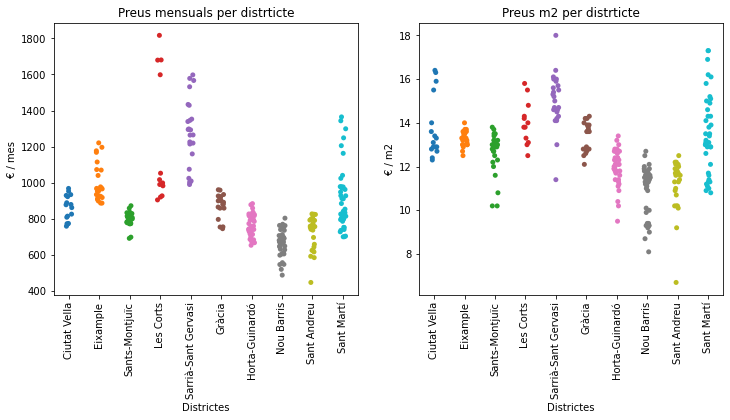

In [26]:
f, axes = plt.subplots(1, 2, figsize=(12, 5))

ax0=sns.stripplot(data=df_Preu_mensual, x="Nom_Districte", y="Preu", ax=axes[0])
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)
ax0.set(xlabel='Districtes', ylabel='€ / mes')
ax0.set_title("Preus mensuals per distrticte")

ax1=sns.stripplot(data=df_Preu_m2, x="Nom_Districte", y="Preu", ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set(xlabel='Districtes', ylabel='€ / m2')
ax1.set_title("Preus m2 per distrticte")    


Text(0.5, 1.0, 'Preus m2 per distrticte')

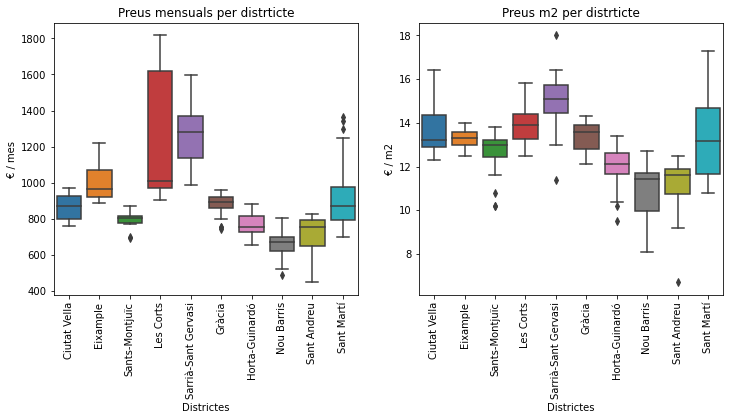

In [27]:
f, axes = plt.subplots(1, 2, figsize=(12, 5))

ax2=sns.boxplot(data=df_Preu_mensual, x="Nom_Districte", y="Preu", ax=axes[0])
ax2.set_xticklabels(ax0.get_xticklabels(),rotation=90)
ax2.set(xlabel='Districtes', ylabel='€ / mes')
ax2.set_title("Preus mensuals per distrticte")

ax3=sns.boxplot(data=df_Preu_m2, x="Nom_Districte", y="Preu", ax=axes[1])
ax3.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax3.set(xlabel='Districtes', ylabel='€ / m2')
ax3.set_title("Preus m2 per distrticte")    


* Dues variables numèriques (Any o Trimestre i Preu)

Text(0.5, 1.0, 'Preus m2 per trimestre')

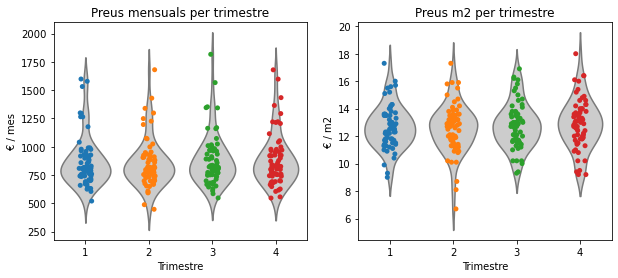

In [28]:
f, axes = plt.subplots(1, 2, figsize=(10, 4))

ax4=sns.violinplot(data=df_Preu_mensual, x="Trimestre", y="Preu", ax=axes[0], inner=None, color=".8")
ax4=sns.stripplot(data=df_Preu_mensual, x="Trimestre", y="Preu", ax=axes[0])
ax4.set(xlabel='Trimestre', ylabel='€ / mes')
ax4.set_title("Preus mensuals per trimestre")

ax5=sns.violinplot(data=df_Preu_m2, x="Trimestre", y="Preu", ax=axes[1], inner=None, color=".8")
ax5=sns.stripplot(data=df_Preu_m2, x="Trimestre", y="Preu", ax=axes[1])
ax5.set(xlabel='Trimestre', ylabel='€ / m2')
ax5.set_title("Preus m2 per trimestre")    

* Tres variables (Barri o Districte, Trimestre i Preu)

Text(0.5, 1.0, 'Preus m2 per distrticte i trimestre')

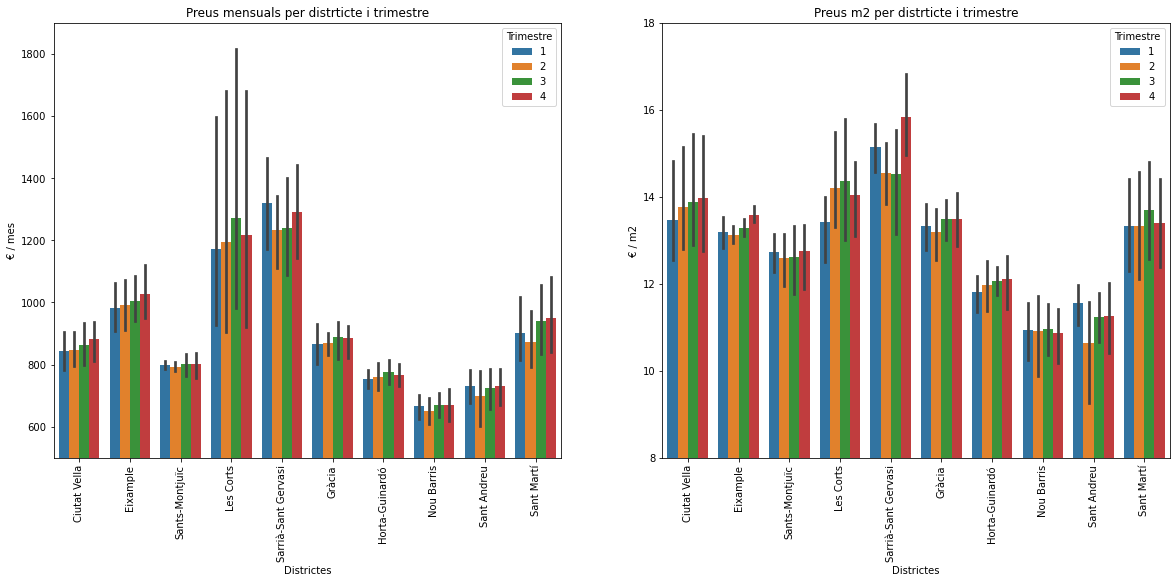

In [29]:
f, axes = plt.subplots(1, 2, figsize=(20, 8))

ax6=sns.barplot(data=df_Preu_mensual, x="Nom_Districte", y="Preu", ax=axes[0], hue='Trimestre')
ax6.set_xticklabels(ax0.get_xticklabels(),rotation=90)
ax6.set_ylim(500, 1900)
ax6.set(xlabel='Districtes', ylabel='€ / mes')
ax6.set_title("Preus mensuals per distrticte i trimestre")

ax7=sns.barplot(data=df_Preu_m2, x="Nom_Districte", y="Preu", ax=axes[1], hue='Trimestre')
ax7.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax7.set_ylim(8, 18)
ax7.set(xlabel='Districtes', ylabel='€ / m2')
ax7.set_title("Preus m2 per distrticte i trimestre")    

# Exercici 2
#### Exporta els gràfics com imatges o com HTML.

In [38]:
# Funció per exportar gràfics a partir del nom que li volem donar i el que té asignat.
def exporta_a_jpg(nombre_fichero, grafico):
    fig = grafico.get_figure()
    fig.savefig(nombre_fichero+".jpeg")

In [39]:
exporta_a_jpg('Registres per districtes', p1)

In [40]:
exporta_a_jpg('Histograma Preus mensual + Preus m2', p2)

In [41]:
exporta_a_jpg('Preus mensuals per distrticte i preus m2 per districte', p4)

In [42]:
exporta_a_jpg('Preus mensuals per distrticte i preus m2 per districte_2', ax0)

In [43]:
exporta_a_jpg('Preus mensuals per distrticte i preus m2 per districte_2 (Boxplot)', ax2)

In [44]:
exporta_a_jpg('Preus mensuals per trimestre i preus m2 per trimestre (Violinplot)', ax4)

In [45]:
exporta_a_jpg('Preus mensuals i preus m2 per districte i trimestre (Barplot)', ax6)

# Exercici 3
#### Proposa alguna visualització que creguis que pot resultar interessant.

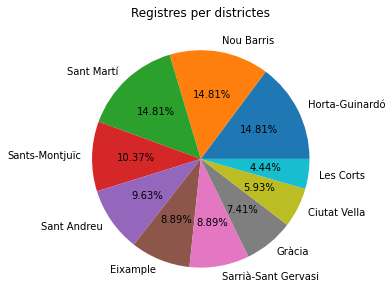

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))

df_Barris.plot.pie(y='N_registres', legend=False, autopct='%1.2f%%', ax=ax)
plt.title('Registres per districtes')
ax.set_ylabel(None)
plt.show()


In [47]:
df_Preu_mensual_2=df_Preu_mensual[["Nom_Districte", "Preu"]]

Text(0.5, 1.0, 'Preus mensuals per distrticte')

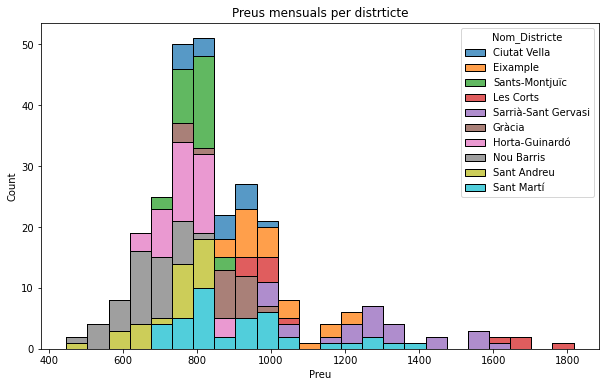

In [48]:
fig, ax = plt.subplots(figsize=(10,6))
sns_plot = sns.histplot(data=df_Preu_mensual_2, x="Preu", hue="Nom_Districte", multiple="stack")
ax.set_title("Preus mensuals per distrticte")

In [49]:
df_Preu_mensual_2=df_Preu_mensual[["Nom_Districte", "Preu"]]

Text(0.5, 1.0, 'Preus m2 per distrticte')

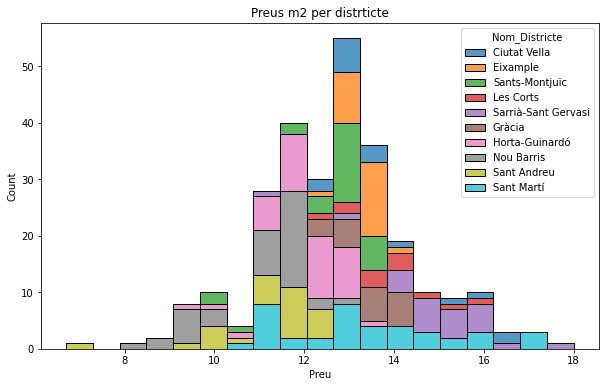

In [50]:
df_Preu_m2_2=df_Preu_m2[["Nom_Districte", "Preu"]]

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=df_Preu_m2_2, x="Preu", hue="Nom_Districte", multiple="stack")
ax.set_title("Preus m2 per distrticte")